1. Perform a full NLP pipeline on a text dataset (Dataset: 20_Newsgroups ). (10 points)

- Carry out text preprocessing (list all the preprocessing tasks performed).
- Extract top keywords using TF-IDF scores.
- Perform named entity recognition (NER, Using spacy) to identify entities.
- Represent text with pretrained embeddings (e.g., Word2Vec, GloVe).
- Display the TF-IDF matrix (or a sample) and visualize the word embeddings in 2D space (eg: t-SNE).
- Perform sentiment analysis (positive/negative/neutral), topic modeling using LDA, extractive summarization of long reviews

In [ ]:
# Loading 20 Newsgroups Dataset from sklearn.dataset
from sklearn.datasets import fetch_20newsgroups

newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Print the total number of documents in the dataset to know how much data is there in the dataset
print("Total documents:", len(newsgroups_data.data))

# Printing the first 5 documents see if they got loaded
print("\nFirst 5 documents:\n")
for i in range(5):
    print(f"--- Document {i+1} ---")  # Label for each document
    print(newsgroups_data.data[i])
    print("\n" + "-"*80 + "\n")      # Print a line to separate the documents visually


Total documents: 18846

First 5 documents:

--- Document 1 ---


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!



--------------------------------------------------------------------------------

--- Document 2 ---
My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone ha

In [ ]:
# Importing Required libraries for text preprocessing
import re                   # For regular expressions to remove numbers
import string               # To access a list of punctuation marks
import nltk                 # Natural Language Toolkit for stopwords
import spacy                # SpaCy for lemmatization
from nltk.corpus import stopwords  # Importing stopwords from NLTK
from sklearn.datasets import fetch_20newsgroups  # For loading the dataset

# Downloading NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Loading SpaCy’s small English model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Get the list of all text documents
texts = newsgroups_data.data

# Define a function to preprocess each document
def preprocess_text(text):
    text = text.lower()  # Converting all text to lowercase for consistency
    text = re.sub(r'\d+', '', text)  # Removeing all digits using regular expression
    text = text.translate(str.maketrans('', '', string.punctuation))  # Removeing punctuation marks
    tokens = [word for word in text.split() if word not in stop_words]  # Tokenize and remove stopwords
    doc = nlp(" ".join(tokens))  # Lemmatize the tokens using SpaCy
    lemmatized = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']  # Exclude pronoun placeholders
    return " ".join(lemmatized)  # Return cleaned and lemmatized text as a single string

# Apply the preprocessing function to the entire dataset
# This will generate a list of cleaned documents
preprocessed_texts = [preprocess_text(doc) for doc in texts]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initializing the TF-IDF Vectorizer
# limiting vocabulary size to 5000 for performance
# Removing common English stopwords
# Enable inverse document frequency weighting
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', use_idf=True)

# Fitting the vectorizer on the preprocessed dataset and transform it into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

# Get the list of feature (word) names for reference
feature_names = vectorizer.get_feature_names_out()

# Extract top N keywords from a specific document
def get_top_keywords(tfidf_vector, feature_names, top_n=10):
    # Convert sparse row to dense array and flatten it
    sorted_indices = np.argsort(tfidf_vector.toarray()).flatten()[::-1]  # Sort by score (descending)
    top_indices = sorted_indices[:top_n]  # Get indices of top N keywords
    top_keywords = [(feature_names[i], tfidf_vector[0, i]) for i in top_indices]
    return top_keywords

# Example: Display top 10 keywords from the first document
doc_index = 0
print(f"\nTop 10 keywords from Document {doc_index + 1}:")
top_keywords = get_top_keywords(tfidf_matrix[doc_index], feature_names, top_n=10)
for word, score in top_keywords:
    print(f"{word}: {score:.4f}")



Top 10 keywords from Document 1:
pen: 0.6133
jagr: 0.2930
devil: 0.2362
fun: 0.2167
regular: 0.2080
season: 0.1996
game: 0.1551
bit: 0.1484
lot: 0.1409
praise: 0.1337


In [ ]:
import spacy

# Load spaCy model with NER
nlp = spacy.load("en_core_web_sm")  # This includes the NER pipeline

# Create list to hold entities from each document
ner_entities_from_cleaned = []

# Process all preprocessed documents using spaCy's efficient nlp.pipe
for doc in nlp.pipe(preprocessed_texts, batch_size=50):
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    ner_entities_from_cleaned.append(entities)

# Print NER output for first 3 cleaned documents
for i in range(3):
    print(f"\n--- Named Entities in Preprocessed Document {i+1} ---")
    for ent_text, ent_label in ner_entities_from_cleaned[i]:
        print(f"{ent_text}  -->  {ent_label}")



--- Named Entities in Preprocessed Document 1 ---

--- Named Entities in Preprocessed Document 2 ---
matt  -->  PERSON

--- Named Entities in Preprocessed Document 3 ---
april  -->  DATE
armenian  -->  NORP
geneva convention  -->  LOC
armenian  -->  NORP
swedish  -->  NORP
attack azerbadjan  -->  ORG
armenian  -->  NORP
armenian  -->  NORP
russian  -->  NORP


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
glove_path = "glove.6B.100d.txt"


--2025-09-14 08:45:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-09-14 08:45:19--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-09-14 08:45:20--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

# Load GloVe embeddings (assuming you've downloaded and extracted glove.6B.100d.txt)
glove_path = "glove.6B.100d.txt"  # 100-dimensional GloVe vectors
embeddings_index = {}

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

# Function to convert document to vector by averaging word embeddings
def document_to_vector(doc):
    words = doc.split()
    valid_embeddings = [embeddings_index[word] for word in words if word in embeddings_index]

    if valid_embeddings:
        return np.mean(valid_embeddings, axis=0)
    else:
        # Return a zero vector if no known words found
        return np.zeros(100)

# Convert all documents to vectors
document_vectors = np.array([document_to_vector(doc) for doc in preprocessed_texts])

print("Shape of document embeddings matrix:", document_vectors.shape)


Shape of document embeddings matrix: (18846, 100)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Recompute or reuse the TF-IDF vectorizer from earlier (if not already done)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_texts)

# Convert to DataFrame for easier inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display first 5 rows of the TF-IDF matrix
print("Sample TF-IDF Matrix:")
print(tfidf_df.head())


Sample TF-IDF Matrix:
    aa  aaron   ab  abandon  abc   ability  able  abolish  abort  abortion  \
0  0.0    0.0  0.0      0.0  0.0  0.000000   0.0      0.0    0.0       0.0   
1  0.0    0.0  0.0      0.0  0.0  0.000000   0.0      0.0    0.0       0.0   
2  0.0    0.0  0.0      0.0  0.0  0.000000   0.0      0.0    0.0       0.0   
3  0.0    0.0  0.0      0.0  0.0  0.065601   0.0      0.0    0.0       0.0   
4  0.0    0.0  0.0      0.0  0.0  0.000000   0.0      0.0    0.0       0.0   

   ...  yugoslavia  yup  zealand  zero  zinaida  zionism  zionist  zip  zone  \
0  ...         0.0  0.0      0.0   0.0      0.0      0.0      0.0  0.0   0.0   
1  ...         0.0  0.0      0.0   0.0      0.0      0.0      0.0  0.0   0.0   
2  ...         0.0  0.0      0.0   0.0      0.0      0.0      0.0  0.0   0.0   
3  ...         0.0  0.0      0.0   0.0      0.0      0.0      0.0  0.0   0.0   
4  ...         0.0  0.0      0.0   0.0      0.0      0.0      0.0  0.0   0.0   

   zoom  
0   0.0  
1   0.0 

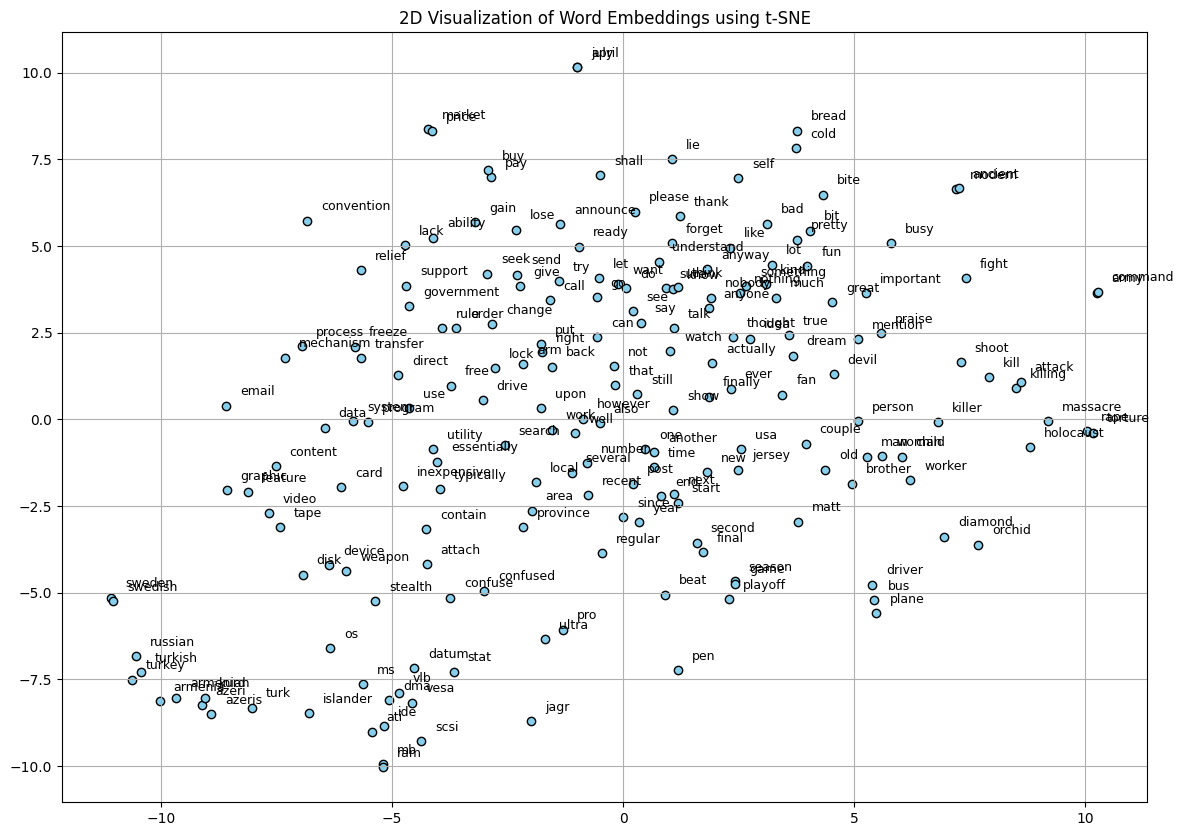

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert word vectors list to a NumPy array
word_vectors_np = np.array(word_vectors)

# Ensure perplexity < number of samples
perplexity = min(30, len(word_vectors_np) - 1)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=1000)
word_embeddings_2d = tsne.fit_transform(word_vectors_np)

# Plot
plt.figure(figsize=(14, 10))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1], edgecolors='k', c='skyblue')

# Annotate points with words
for i, word in enumerate(valid_words):
    plt.text(word_embeddings_2d[i, 0] + 0.3, word_embeddings_2d[i, 1] + 0.3, word, fontsize=9)

plt.title("2D Visualization of Word Embeddings using t-SNE")
plt.grid(True)
plt.show()


In [ ]:
from textblob import TextBlob

# Perform sentiment analysis on preprocessed documents
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to a sample of the preprocessed dataset
sample_docs = preprocessed_texts[:100]  # Limit for performance
sentiments = [get_sentiment(doc) for doc in sample_docs]

# Count sentiment types
from collections import Counter
print("Sentiment Distribution:", Counter(sentiments))


Sentiment Distribution: Counter({'Neutral': 50, 'Positive': 36, 'Negative': 14})


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Use CountVectorizer for LDA input
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_counts = vectorizer.fit_transform(sample_docs)

# LDA with 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

# Display topics
def print_topics(model, feature_names, num_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

print_topics(lda, vectorizer.get_feature_names_out(), 10)



Topic 1:
transfer bobby run bus datum want say device window file

Topic 2:
people time arm make second buy use think government speed

Topic 3:
order use look irq law card year know word title

Topic 4:
say use sound make people channel like know muslim work

Topic 5:
school think dave mike lock use time player phil know


In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

nlp = spacy.load("en_core_web_sm")

# Choose a long document
long_doc = texts[0]

# Break into sentences
doc = nlp(long_doc)
sentences = [sent.text.strip() for sent in doc.sents if len(sent.text.strip()) > 20]

# TF-IDF over the sentences
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)

# Score sentences by TF-IDF sum
sentence_scores = np.asarray(X.sum(axis=1)).ravel()

# Get top 3 sentences
top_n = 3
top_indices = sentence_scores.argsort()[-top_n:][::-1]

print("\nSummary:")
for idx in top_indices:
    print(f"- {sentences[idx]}")



Summary:
- Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway.
- However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens.
- I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils.
